
# Project: The Movie Database (TMDb) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will be working on this project with The Movie Database (TMDb for short), originally taken from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata); it contains information about a thousand movies, their revenue and user ratings.
Each row is an observation for a particular movie, and include a range of data about each film. Relevant data to be used in the following analysis include the following columns or variables:
- popularity
- revenue
- genres
- release_date
- directors
- budget
- vote_count

> We are going to analyze the data associated with TMDb, and in particular we will be interested in finding trends and patterns amongst the movie characteristics.

> In this project, we will be exploring and analyzing the following questions:
1. Which genres are most popular from year to year?
2. How is runtime trending over time?
3. Do higher budget movies always generate big revenue?

In [1]:
# Setting up my environment by importing core packages designed for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will be loading in our movie data which will help us answer our questions. We will first of all be assessing and building intuition about our data to identify any problems in their quality or structure, and secondly clean our data by modifying, replacing, or removing data to ensure that our dataset is of the highest quality and as well-structured as possible.

### General Properties

In [2]:
# Load the movie data into a pandas' dataframe
df = pd.read_csv('tmdb-movies.csv')

# Let's create a function that when called, display a specific number of rows in our dataframe
def displ_rows(dt_frame, num_rows):
 return dt_frame.head(num_rows)

# Display first two rows
displ_rows(df, 2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Let's have an idea of the dimensions of the dataframe
df.shape

(10866, 21)

Our dataframe contains 10866 rows and 21 columns

In [4]:
# Let's have a look at the column labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


The column names are all in lowercase, descriptive enough, and separated with underscore where it's necessary

In [5]:
# let's display a concise summary of our dataframe,
# and the number of non-null values in each column as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are many columns that have non-null/missing values (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.

Since values aren't numerical, we cannot fix that issue by impeding it with the mean

In [6]:
# Checking the datatype of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The datatype here is incorrect: release_date is represented as a string, when ideally it should be represented as datetime object

In [7]:
# Release_date datatype appears to be object, let's investigate
# more to see which datatype it exactly is
type(df['release_date'][0])

str

In [8]:
# Let's check the datatype of release_year column as well
type(df['release_year'][0])

numpy.int64

In [9]:
# Let see how many duplicate rows we have in our dataset if any
df.duplicated().sum()

1

There is only one duplicate row in our dataset

In [10]:
# Returning the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [11]:
# View missing value counts for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df.homepage.nunique()

2896

We have __7930__ rows with missing values

In [13]:
# Descriptive statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The 'id' column is taken into account in our calculation, we should define it as an index.




### Data Cleaning

In [14]:
# Let's drop some extraneous columns that aren't relevant to our questions
drop_columns = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj']
df.drop(drop_columns, axis = 1, inplace = True) # Since there's no need to have two id columns

In [15]:
# Confirm changes
displ_rows(df, 3) # Calling the display function

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [16]:
df.shape

(10866, 13)

In [17]:
# Drop rows with any null values in our dataset
df.dropna(inplace = True)

In [18]:
# Confirm correction by rechecking missing values
df.isnull().sum().any()

False

In [19]:
df.shape

(10732, 13)

In [20]:
# Let's specify id column as index of our dataframe
df.to_csv('df_movies.csv', index = False)
df = pd.read_csv('df_movies.csv', index_col = 'id')
displ_rows(df, 5) # Callling the display function


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [21]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [22]:
# Confirm correction by rechecking duplicates in our dataframe
sum(df.duplicated())

0

In [23]:
# Converting release_date column to datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10731 non-null  float64       
 1   budget          10731 non-null  int64         
 2   revenue         10731 non-null  int64         
 3   original_title  10731 non-null  object        
 4   cast            10731 non-null  object        
 5   director        10731 non-null  object        
 6   runtime         10731 non-null  int64         
 7   genres          10731 non-null  object        
 8   release_date    10731 non-null  datetime64[ns]
 9   vote_count      10731 non-null  int64         
 10  vote_average    10731 non-null  float64       
 11  release_year    10731 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


In [24]:
# Let's view all the columns containing the pipe |
pipe_df = df[df['cast'].str.contains('|')]
pipe_df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,2066-06-15,11,7.4,1966
20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,2066-12-21,20,5.7,1966
39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,2066-01-01,11,6.5,1966


In [25]:
# Create a copy of the dataframe
df1 = pipe_df.copy()

There are 03 columns (cast, director, and genres) containing multiple values separated by pipe (|) character.
Throughout our analysis, we are going to consider for each column, the value on the far left(before the first pipe), and get rid of the rest.

In [26]:
split_columns = ['cast', 'director', 'genres'] # columns to split by "|"

# Extracting the first value of each column
# Apply split function to each column
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])


In [27]:
# df1 holds info for the values before the "|"s
df1

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,2015-05-13,6185,7.1,2015
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,0,The Endless Summer,Michael Hynson,Bruce Brown,95,Documentary,2066-06-15,11,7.4,1966
20379,0.065543,0,0,Grand Prix,James Garner,John Frankenheimer,176,Action,2066-12-21,20,5.7,1966
39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy,Eldar Ryazanov,94,Mystery,2066-01-01,11,6.5,1966


In [28]:
# Confirm the pipe (|) removal

displ_rows(df1, 10) # Calling the display function

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,2015-05-13,6185,7.1,2015
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2015-04-01,2947,7.3,2015
281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,2015-12-25,3929,7.2,2015
87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger,Alan Taylor,125,Science Fiction,2015-06-23,2598,5.8,2015
286217,7.667400,108000000,595380321,The Martian,Matt Damon,Ridley Scott,141,Drama,2015-09-30,4572,7.6,2015
211672,7.404165,74000000,1156730962,Minions,Sandra Bullock,Kyle Balda,91,Family,2015-06-17,2893,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

In [29]:
df1.genres.value_counts()

Drama              2443
Comedy             2313
Action             1587
Horror              914
Adventure           585
Thriller            491
Documentary         387
Crime               380
Animation           375
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: genres, dtype: int64

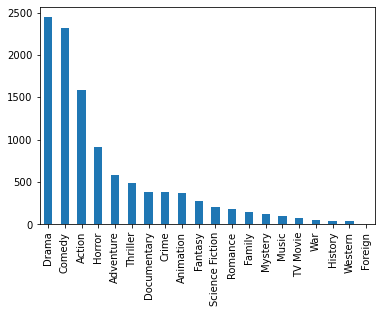

In [30]:
df1['genres'].value_counts().plot(kind = 'bar');

The four most recurring genre seem to be 'Drama', 'Comedy', 'Action', and 'Horror'; let's see if it's still the same thing in terms of popularity

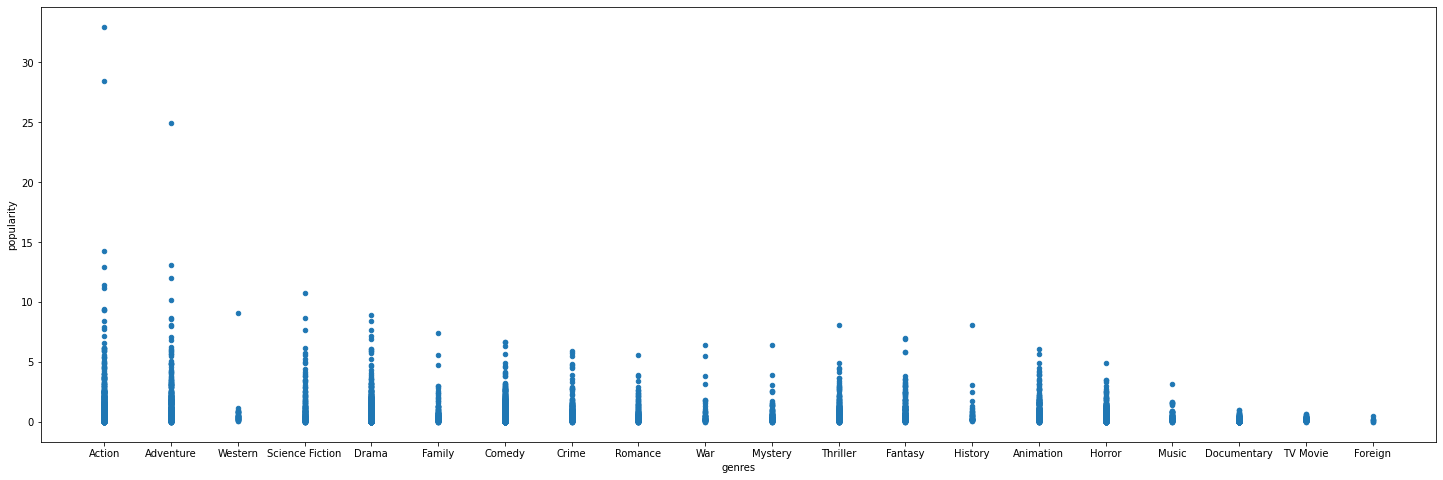

In [31]:
df1.plot(x = 'genres', y = 'popularity', kind = 'scatter', figsize = (25, 8));

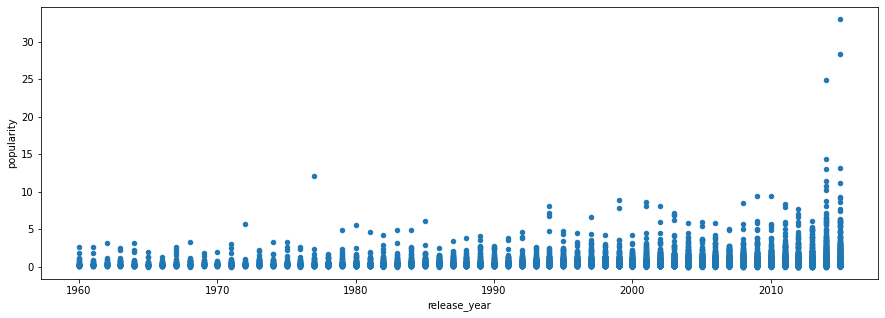

In [32]:
df1.plot(x = 'release_year', y = 'popularity', kind = 'scatter', figsize = (15, 5));

Action, Adventure, Science fiction and Drama are the four most popular genres

### How is runtime trending over time?

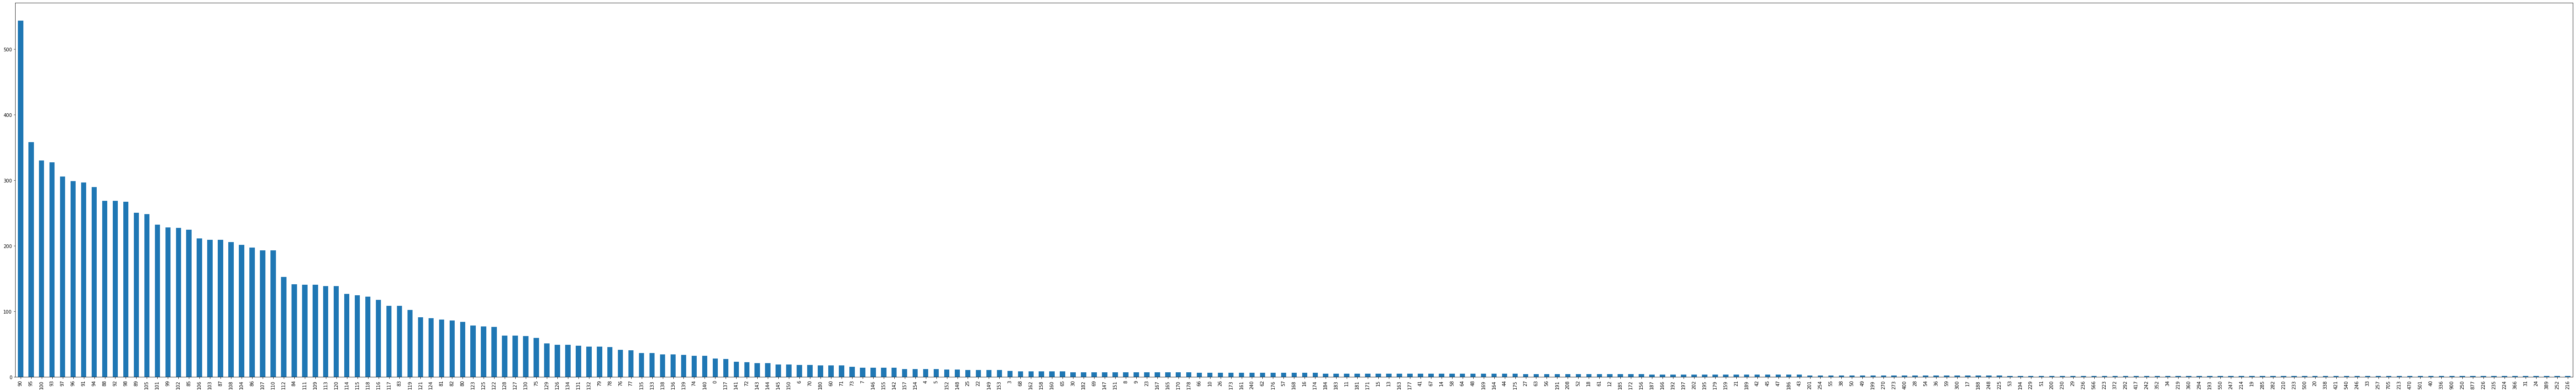

In [33]:
df1['runtime'].value_counts().plot(kind = 'bar', figsize = (100, 15));

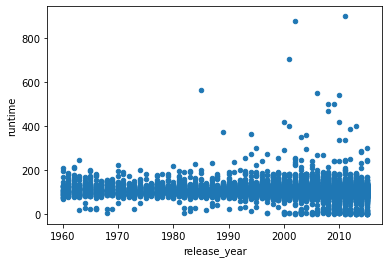

In [34]:
df1.plot(x = 'release_year', y = 'runtime', kind = 'scatter');

Runtime hasn't changed much over time, most of the movies are still around 200 min or 3 hours and 20 mins

### Do higher budget movies always generate big revenue?

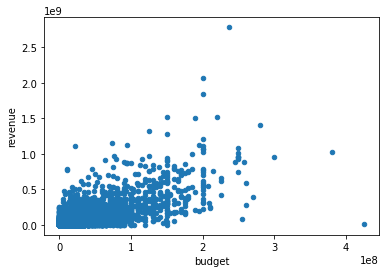

In [35]:
df1.plot(x = 'budget', y = 'revenue', kind = 'scatter');

There seems to be a positive correlation between higher budget movies and big revenue

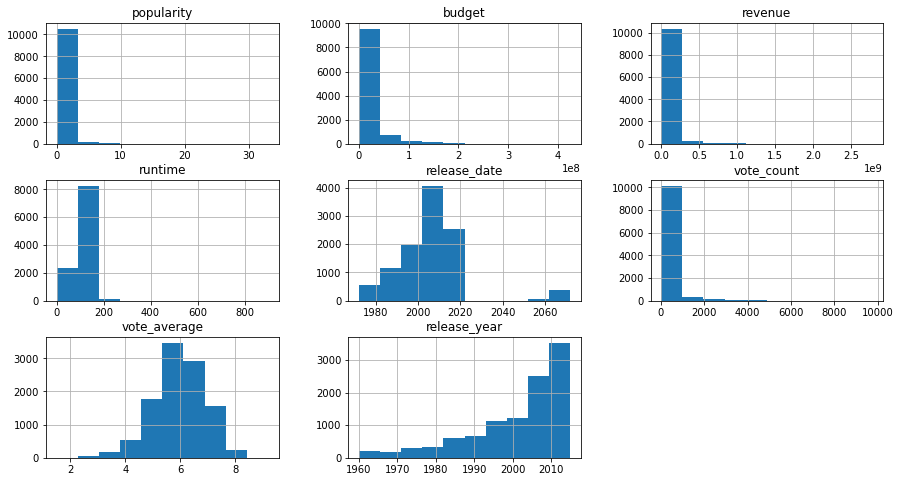

In [36]:
# let's have a glimpse of most of our variables progression
df1.hist(figsize = (15, 8));


Popularity, budget, revenue and vote_count seem to have a strong positive correlation. But since correlation doesn't necessarily means causation, more details on dataset might be needed

<a id='conclusions'></a>
## Conclusions

> The first question about examining genres popularity over time revealed that there was a strong correlation between four genres (action, adventure, science fiction and drama) and their popularity from year to year.

> Then we went on an analyzed whether runtime was trending over time or not; we realized that movie runtime did not actually know a major variation

> After that, we pondered on the question of relationship between higher budgets and big revenue, and we found that very few films with higher bugdet tend to have big revenues. 

### Limitations

> We did not use inferential statistics neither did we use machine learning to complete this project, so our findings may be tentative.

> Revenue and budget bar charts are very skewed to the right as shown above, which could have distorted the results a little bit. Some columns had more than 7 000 missing values out of 10 000, so we had no other choice than to drop them.

### Reference

(https://www.markdownguide.org/basic-syntax/)
(https://review.udacity.com/#!/reviews/3637188)
(https://stackoverflow.com/questions/38810009/matplotlib-plot-bar-and-line-charts-together)